In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import math
import Chronos


In [13]:
60*60*24

86400

In [5]:
def make_train_df():
    y_data = pd.date_range('2018-01-01', '2019-01-01').astype(np.int64)/(1e9*60*60*24)

    train_df = pd.DataFrame(data={"ds": pd.date_range('2018-01-01', '2019-01-01'),
                                  "y" : np.sin(y_data*2*math.pi/365.25)})
    return train_df
    

In [6]:
train_df = make_train_df()
train_df

,ds,y
0,2018-01-01,-1.175661e-14
1,2018-01-02,1.720158e-02
2,2018-01-03,3.439806e-02
3,2018-01-04,5.158437e-02
4,2018-01-05,6.875541e-02
...,...,...
361,2018-12-28,-7.304519e-02
362,2018-12-29,-5.587876e-02
363,2018-12-30,-3.869579e-02
364,2018-12-31,-2.150137e-02


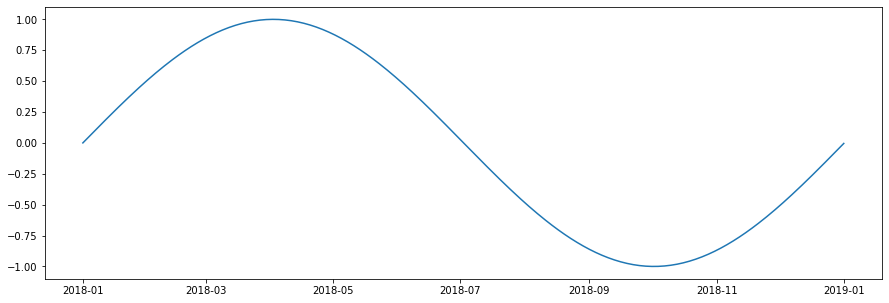

In [7]:
plt.figure(figsize=(15,5))
plt.plot(train_df['ds'], train_df['y'])
plt.show()

In [8]:
importlib.reload(Chronos)
train_df = make_train_df()
my_cr = Chronos.Chronos(G=1000,
                        p_m= 0.3, 
                        r_m = 0.4,
                        yearly_seasonality=5,
                        weekly_seasonality=1)
my_cr = my_cr.fit(train_df)

population initalized


In [14]:
result_df = my_cr.predict(train_df)
print(result_df.head())

          ds             y      yhat
0 2018-01-01 -1.175661e-14  0.981400
1 2018-01-02  1.720158e-02  1.099839
2 2018-01-03  3.439806e-02  1.248383
3 2018-01-04  5.158437e-02  1.307322
4 2018-01-05  6.875541e-02  1.222267


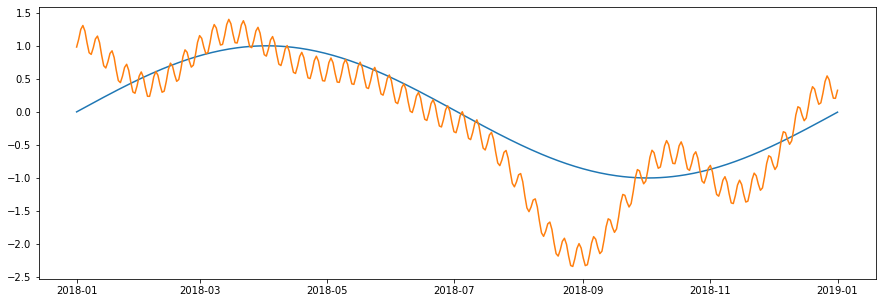

{'growth::const': 0.23742202706404159,
 'growth::coef': -0.00213874679090403,
 'yearly::order_1_coef': (0.9825089380380638, 0.3368199479389397),
 'yearly::order_2_coef': (-0.2654491061841279, 0.11948421516794172),
 'yearly::order_3_coef': (0.052757708211011334, -0.10814639426197453),
 'yearly::order_4_coef': (0.05059893057786785, 0.34412798535706124),
 'yearly::order_5_coef': (-0.17070567141868803, 0.2240227439111162),
 'weekly::order_1_coef': (0.07932204501325107, -0.17001695128192287)}

In [10]:
plt.figure(figsize=(15,5))
plt.plot(result_df['ds'], result_df['y'])
plt.plot(result_df['ds'], result_df['yhat'])
plt.show()
my_cr.get_params()

In [11]:
df = pd.read_csv('data/prophetData.csv')
df['ds'] = pd.to_datetime(df['ds'])
df.head()
df = df[-800:]
#df['y'] = df['y']*100

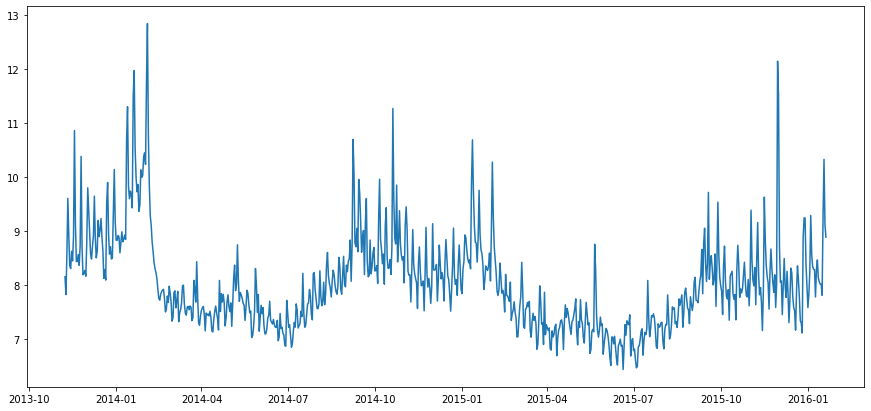

In [12]:
plt.figure(figsize=(15,7))
plt.plot(df['ds'], df['y'])
plt.show();

In [16]:
validation_fraction = 0.2

validation_size = int(df.shape[0] * validation_fraction)
train_df = df.iloc[:-validation_size]
validation_df = df.iloc[-validation_size:]
print(train_df.shape)
print(validation_df.shape)

(640, 2)
(160, 2)


In [17]:
train_df

,ds,y
2105,2013-11-08,8.157657
2106,2013-11-09,7.829233
2107,2013-11-10,8.573952
2108,2013-11-11,9.611329
2109,2013-11-12,8.923858
...,...,...
2740,2015-08-08,7.007601
2741,2015-08-09,7.073270
2742,2015-08-10,7.265430
2743,2015-08-11,7.602401


In [50]:
def MPE(y_true, y_pred_matrix):
    difference = np.abs(y_true - y_pred_matrix) # result is (n_individuals, n_obs)
    quotient = difference / y_true
    
    result = np.nanmean(quotient, axis=1)
    
    return result
    

In [51]:
importlib.reload(Chronos)
train_df = df.iloc[:-validation_size]
validation_df = df.iloc[-validation_size:]

#my_cr = Chronos.Chronos(G=1000, evaluation_function="RMSE")
my_cr = Chronos.Chronos(G=1000, evaluation_function=MPE)
my_cr = my_cr.fit(train_df)

population initalized


In [52]:
result_df = my_cr.predict(train_df)
result_df.head()

,ds,y,yhat
2105,2013-11-08,8.157657,8.370162
2106,2013-11-09,7.829233,8.067318
2107,2013-11-10,8.573952,8.259861
2108,2013-11-11,9.611329,8.452685
2109,2013-11-12,8.923858,8.442641


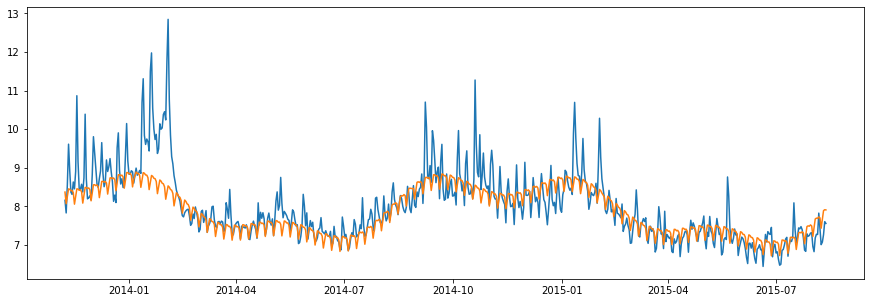

{'growth::const': 8.054540034030484,
 'growth::coef': -0.000318494126558138,
 'yearly::order_1_coef': (-0.48093085172669836, 0.5342584546905086),
 'yearly::order_2_coef': (0.11003893434979431, -0.06451329229943943),
 'yearly::order_3_coef': (0.18882813084371214, 0.26583654001111),
 'weekly::order_1_coef': (0.1458425601509311, 0.02537185088544417),
 'weekly::order_2_coef': (-0.003270366921264811, 0.10190039451477396),
 'weekly::order_3_coef': (-0.03871429839936426, -0.016995813516920547)}

In [53]:
plt.figure(figsize=(15,5))
plt.plot(result_df['ds'], result_df['y'])
plt.plot(result_df['ds'], result_df['yhat'])
plt.show()
my_cr.get_params()

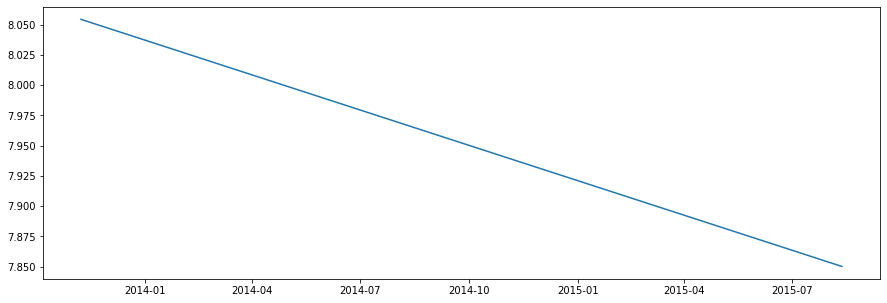

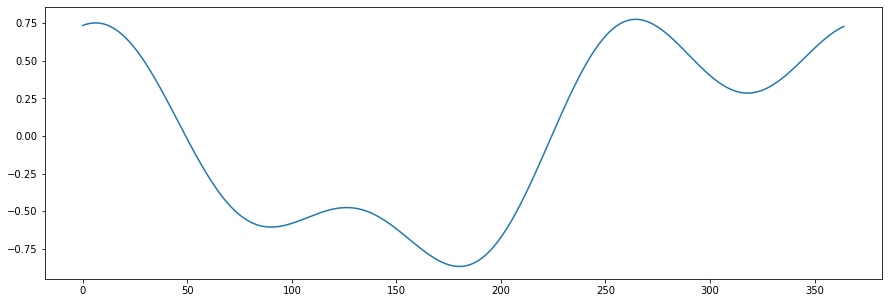

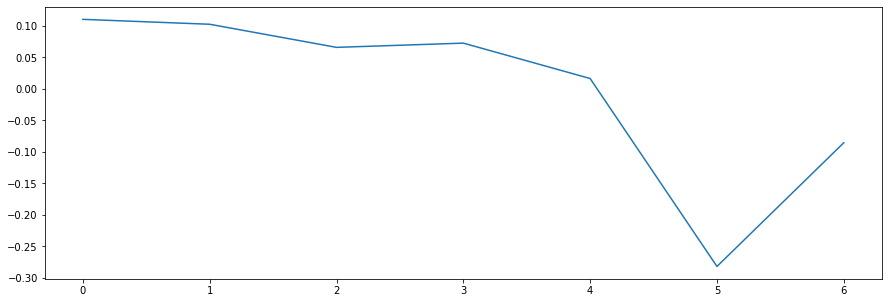

In [54]:
my_cr.plot_components(result_df)